# fastai approach

In [2]:
from fastcore.all import *
from fastai.vision.all import *
import pathlib

In [5]:
! wandb login

wandb: Currently logged in as: gratkadlafana. Use `wandb login --relogin` to force relogin


In [6]:
import wandb
wandb.init(project="phcd_numbers")

wandb: Currently logged in as: gratkadlafana. Use `wandb login --relogin` to force relogin


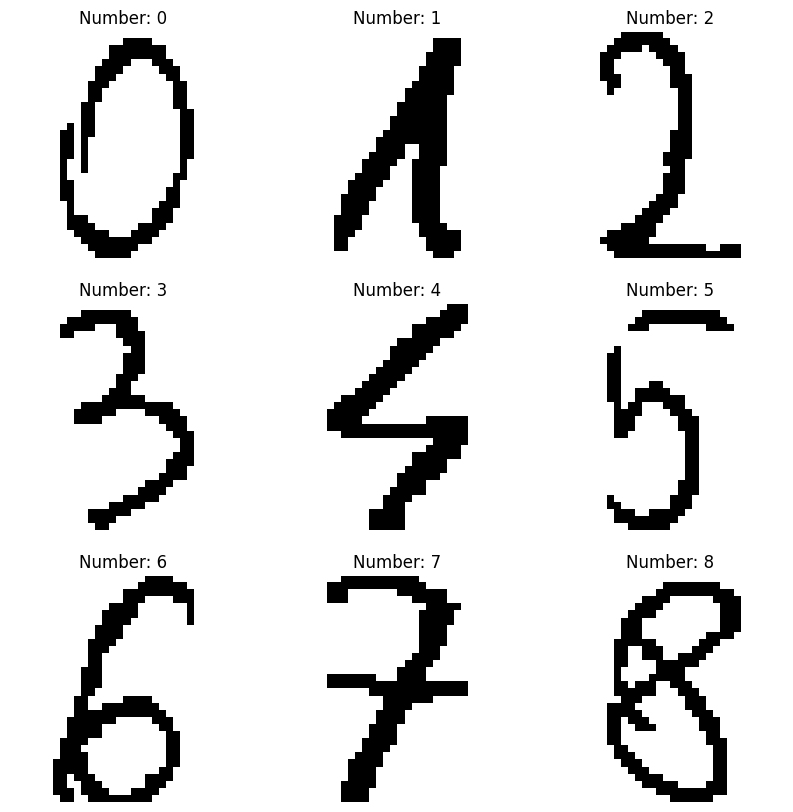

In [7]:
data_path = pathlib.Path("../data/numbers")


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    ax = axes[i]
    img_path = list((data_path / str(i)).glob("*.png"))[0]
    im = Image.open(img_path)
    ax.imshow(im, cmap="gray")
    ax.set_title(f"Number: {i}")
    ax.axis("off")

plt.show()


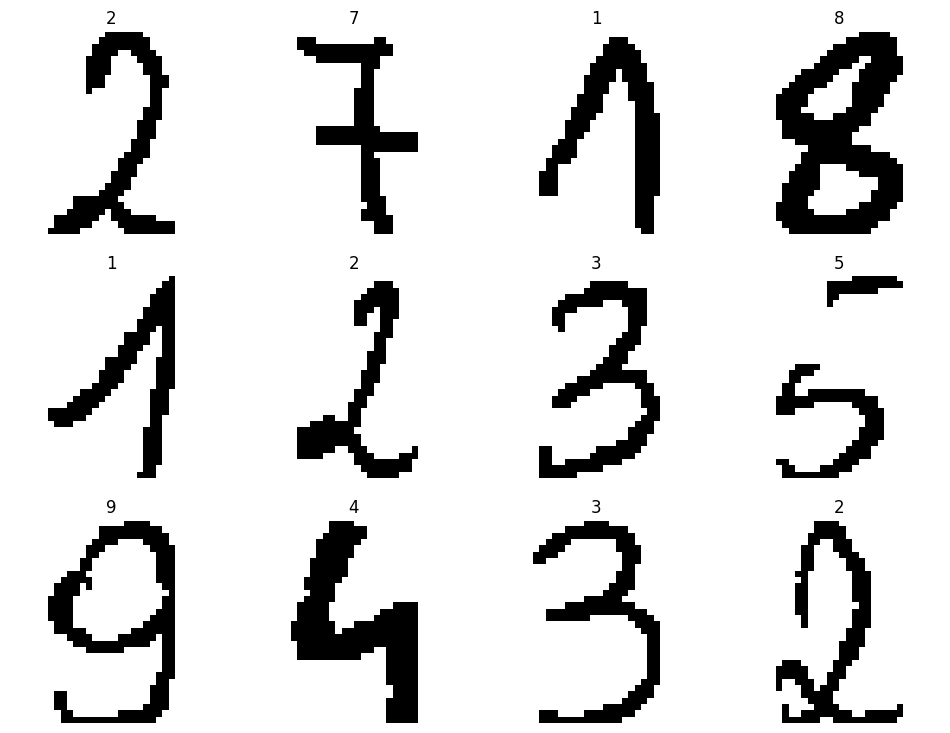

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
).dataloaders(data_path, bs=32)

dls.show_batch(max_n=12)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/wiktor/.pyenv/versions/3.9.10/envs/master-thesis/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/wiktor/.pyenv/versions/3.9.10/envs/master-thesis/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/wiktor/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.634021,0.418327,0.134074,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.111170,0.052639,0.015411,00:38
1,0.050624,0.030764,0.009328,00:38
2,0.024113,0.025007,0.006813,00:39


Predicted label: 1, Actual label: 1
Probability: 0.9998


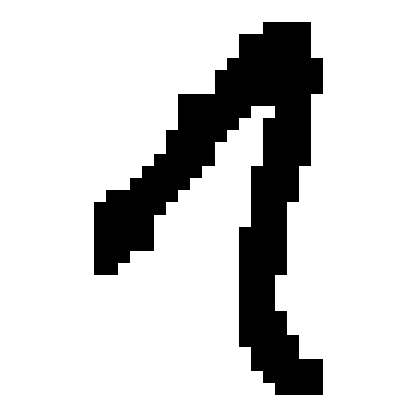

In [22]:
import numpy as np

data_path = pathlib.Path("../data/numbers")

i = np.random.randint(0, 10)
path = np.random.choice(list((data_path / str(i)).glob("*.png")))
prediction,_,probs = learn.predict(PILImage.create(path))
print(f"Predicted label: {prediction}, Actual label: {i}")
print(f"Probability: {probs[i]:.4f}")

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

im = Image.open(path)
ax.imshow(im, cmap="gray")
ax.axis("off")

plt.show()

Predicted: 7, Actual: 7 with probability: 0.9993
../data/numbers/7/7_1678_99_M_2E.png


Predicted: 2, Actual: 2 with probability: 1.0000
../data/numbers/2/2_2195_96_M_2B.png


Predicted: 1, Actual: 1 with probability: 0.9994
../data/numbers/1/1_2844_92_M_2B.png


Predicted: 7, Actual: 7 with probability: 0.9997
../data/numbers/7/7_0893_99_M_2E.png


Predicted: 6, Actual: 6 with probability: 1.0000
../data/numbers/6/6_1821_99_M_2B.png


Predicted: 8, Actual: 8 with probability: 0.9996
../data/numbers/8/8_1475_96_M_2C.png


Predicted: 2, Actual: 2 with probability: 0.9998
../data/numbers/2/2_0795_97_K_2E.png


Predicted: 4, Actual: 4 with probability: 1.0000
../data/numbers/4/4_1598_98_M_2E.png


Predicted: 9, Actual: 9 with probability: 0.9998
../data/numbers/9/9_1415_96_K_2C.png


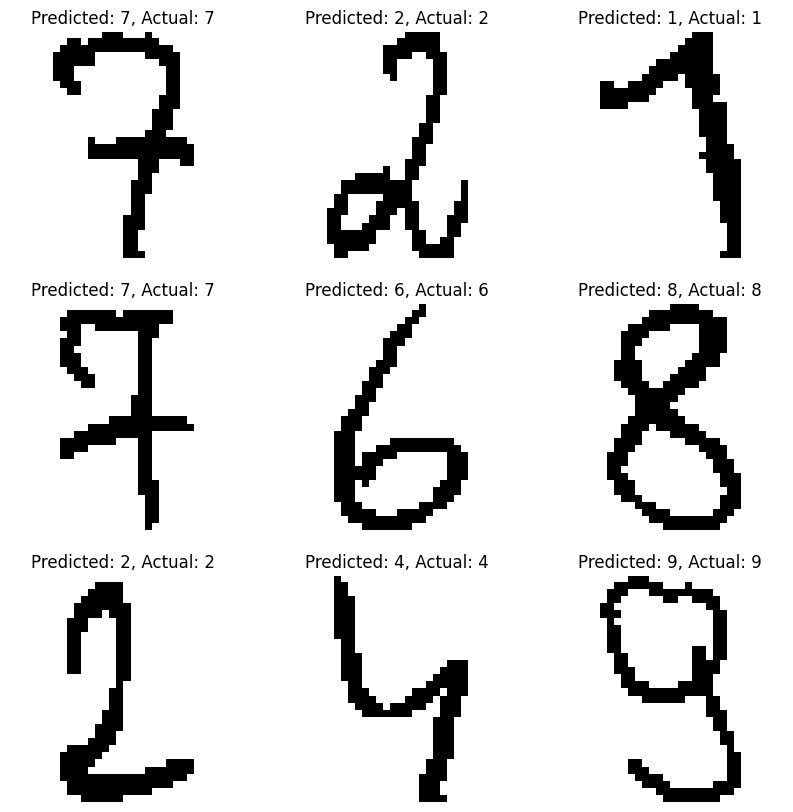

In [26]:
import numpy as np

data_path = pathlib.Path("../data/numbers")

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    ax = axes[i]
    img_class = np.random.randint(0, 10)
    path = np.random.choice(list((data_path / str(img_class)).glob("*.png")))
    im = PILImage.create(path)
    prediction,_,probs = learn.predict(im)

    print(f"Predicted: {prediction}, Actual: {img_class} with probability: {probs[img_class]:.4f}")
    print(path)
    
    ax.imshow(im, cmap="gray")
    ax.set_title(f"Predicted: {prediction}, Actual: {img_class}")
    ax.axis("off")

plt.show()

#